# Geodatenanalyse 1

## Übung 5: Visualisierung - Lösung

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Aufgabe 1

Bilde folgende zwei Funktionen im Interval $[0, 100]$ mit Hilfe von Liniendiagrammen ab:
- $f(x) = \sqrt{x} - 4$
- $f(x) = log_e(x)$

Benutze dazu die numpy Funktion `np.linspace (*start*, *stop*, *number of elements*)` und `matplotlib.pylot.plot()`.

Hinweis: `np.linspace()`funktioniert ähnlich wie `np.arange()`, allerdings wird nicht das Inkrement vorgegeben, sondern die Anzahl an gleichmäßig verteilten Elementen. Der Stopwert ist automatisch enthalten. 

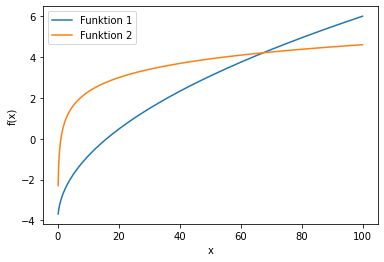

In [2]:
# [1]
# mit Hilfe von np.linspace() die x-Werte definieren
x = np.linspace(0.1, 100, 1000)

# die y-Werte für die erste Formel ausrechnen und plotten
y1 = np.sqrt(x) - 4
plt.plot(x, y1, label='Funktion 1')

# die y-Werte für die zweite Formel ausrechnen und plotten
y2 = np.log(x)
plt.plot(x, y2, label='Funktion 2')

# Achsenbeschriftungen
plt.xlabel('x')
plt.ylabel('f(x)')

# Legende 
plt.legend()
plt. show()

### Aufgabe 2

Erzeuge dir einen Vektor mit 200 normalverteilten Zufallszahlen mit Hilfe von `numpy.random.normal(mean, sigma, n)`. 

Dann stelle die Datenpunkte in einer Abbildung mit 2 Graphen dar: links ein Boxplot (`boxplot()`), rechts ein Histogramm (`hist()`).  

Füge jeweils auch Achsenbeschriftungen und Abbildungstitel hinzu. 

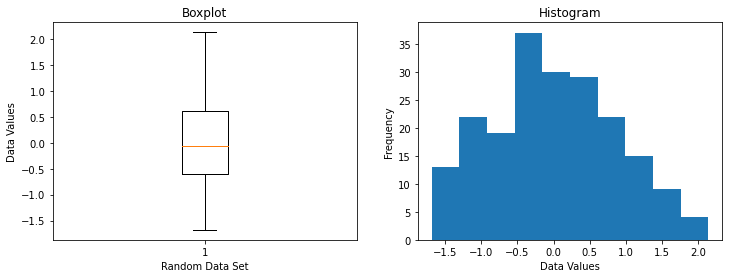

In [3]:
# [2]

# Zufallszahlen 
data = np.random.normal (0, 1, 200) # Standardnormalverteilung (0, 1)

# Abbildung mit Achsen und 2 subplots anlegen
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot im 1. Achsenelement darstellen
axs[0].boxplot(data)
axs[0].set_xlabel('Random Data Set')
axs[0].set_ylabel('Data Values')
axs[0].set_title('Boxplot')

# Histogramm im 2. Achsenelement darstellen
axs[1].hist(data)
axs[1].set_xlabel('Data Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram')

# Abbildung speichern 
plt.savefig('Uebung_5.pdf')
plt.show()

### Aufgabe 3

Die Europäische Umweltagentur (EEA) hat einen Datensatz zusammengestellt, durch welchen man den Zusammenhang zwischen Energienutzung, Wirtschaftsleistung und Einwohnerzahl gut darstellen kann. Diese Daten sind in der Datei *EEA_dataset.csv* zusammengestellt.

1. Erstelle eine Punktwolke (`plt.scatter()`), mit der Wirtschaftsleistung auf der x-Achse und der Energienutzung auf der y-Achse. Bitte passe auch die Achsenlimits für eine bedeutungsvolle Darstellung an.

2. Markiere den weltweiten Durchschnitt für beide Achsen mit einer horizontalen (`ax.axvline(x-Wert)`), bzw. vertikalen (`ax.axhline(y-Wert)`) Linie. 

3. Hebe den Datenpunkt für Deutschland farbig hervor.

4. Stelle die Einwohnerzahl als Farbe der Punktwolke dar, und erstelle für die dritte Dimension eine passende Legende (`plt.colorbar()`).


Datenquelle: [European Environment Agency](https://www.eea.europa.eu/data-and-maps/figures/correlation-of-per-capita-energy)

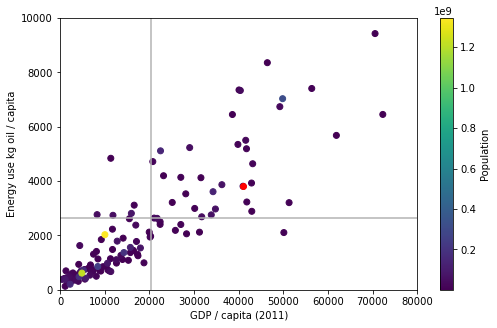

In [5]:
# [3]

# Daten einlesen 
data = np.genfromtxt(open("EEA_dataset.csv", "rb"), delimiter=",", skip_header=1)

# Abbildung und Achsen erstellen
fig, ax = plt.subplots(1, figsize=(8, 5))

color = (data[:, 3])
cl = ax.scatter(data[:, 2], data[:, 1], c=color)

# Mittelwerte ausrechnen 
x_avg = np.mean(data[:, 2])
y_avg = np.mean(data[:, 1])

# Mittelwerte als horizontale bzw. vertikale Linien darstellen
ax.axvline(x_avg, c='0.7')
ax.axhline(y_avg, c='0.7')

# Deutschland ist Index 117
de_idx = 116
ax.plot(data[de_idx, 2], data[de_idx, 1], 'ro')

# hier wird die dritte Achse erstellt
cb = plt.colorbar(cl, label='Population')

# Achsenlimits und Beschriftungen
ax.set_xlabel('GDP / capita (2011)')
ax.set_ylabel('Energy use kg oil / capita')

ax.set_xlim([0, 80000])
ax.set_ylim([0, 10000])

plt.show()

## ENDE